In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/Shared\ drives/TFM_Clara/6_robot-surgery-segmentation-master

/content/drive/Shared drives/TFM_Clara/6_robot-surgery-segmentation-master


In [3]:
!pip3 install albumentations

     |████████████████████████████████| 634kB 4.0MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654021 sha256=94fb1d9ae8de71a6cceb3cebc5674edd69c5c4abfcad4b084bed10931f2fe32d
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [4]:
!pip install torchvision

In [5]:
from torch import nn
from loss import LossBinary
from torch.optim import Adam
from torch.utils.data import DataLoader
%matplotlib inline
from pylab import *
import cv2
import torch
from dataset_ft import load_image
from dataset_ft import load_mask
from utils import cuda
from generate_masks import get_model
from albumentations import Compose, Normalize
from albumentations.pytorch.functional import img_to_tensor
from validation import validation_binary
from dataset import RoboticsDataset
import glob
import matplotlib.pyplot as plt
from torch.utils.data.dataset import Dataset  # For custom data-sets
from torchvision import transforms
from torchsummary import summary
rcParams['figure.figsize'] = 10, 10

In [6]:
def img_transform(p=1):
    return Compose([
        Normalize(p=1)
    ], p=p)

In [7]:
def mask_overlay(image, mask, color=(0, 255, 0)):
    """
    Helper function to visualize mask on the top of the car
    """
    mask = np.dstack((mask, mask, mask)) * np.array(color)
    mask = mask.astype(np.uint8)
    weighted_sum = cv2.addWeighted(mask, 0.5, image, 0.5, 0.)
    img = image.copy()
    ind = mask[:, :, 1] > 0    
    img[ind] = weighted_sum[ind]    
    return img

In [8]:
model_path = 'data/models/unet11_binary_20/model_0.pt'
model = get_model(model_path, model_type='UNet11', problem_type='binary')

In [10]:
from train_ft import train

jaccard_weight = 0.3
#fold = 1
root = !pwd
root = root[0]
batch_size = 2
n_epochs = 20
lr1 = 0.0001
lr2 = 0.00001
num_workers = 12
train_size = 0.6
train_crop_height = 1056
train_crop_width = 1920
val_crop_height = 1056
val_crop_width = 1920
fold = "video9_raw"
#for fold in range(1,5) :
train(model, "unet11", 0, "ent", jaccard_weight, fold, root, batch_size, n_epochs+10, lr1, num_workers, 1, train_size, train_crop_height, train_crop_width, val_crop_height, val_crop_width)
train(model, "unet11", 0, "ent", jaccard_weight, fold, root, batch_size, n_epochs+20, lr2, num_workers, 1, train_size, train_crop_height, train_crop_width, val_crop_height, val_crop_width)
#n_epochs = n_epochs+20

num train = 1579, num_val = 1053


Epoch 21, lr 0.0001:   0%|          | 0/1580 [00:00<?, ?it/s]

Restored model, epoch 21, step 6,760


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
Epoch 22, lr 0.0001:   0%|          | 0/1580 [00:00<?, ?it/s]

Valid loss: 0.19773, jaccard: 0.66009


Epoch 23, lr 0.0001:   0%|          | 0/1580 [00:00<?, ?it/s]

Valid loss: 0.17593, jaccard: 0.69848


Epoch 24, lr 0.0001:   0%|          | 0/1580 [00:00<?, ?it/s]

Valid loss: 0.22365, jaccard: 0.64641


Epoch 25, lr 0.0001:   0%|          | 0/1580 [00:00<?, ?it/s]

Valid loss: 0.14237, jaccard: 0.74440


Epoch 26, lr 0.0001:   0%|          | 0/1580 [00:00<?, ?it/s]

Valid loss: 0.13198, jaccard: 0.75153


Epoch 27, lr 0.0001:   0%|          | 0/1580 [00:00<?, ?it/s]

Valid loss: 0.13281, jaccard: 0.76033


Epoch 28, lr 0.0001:   0%|          | 0/1580 [00:00<?, ?it/s]

Valid loss: 0.10763, jaccard: 0.79177


Epoch 29, lr 0.0001:   0%|          | 0/1580 [00:00<?, ?it/s]

Valid loss: 0.10720, jaccard: 0.79598


Epoch 30, lr 0.0001:   0%|          | 0/1580 [00:00<?, ?it/s]

Valid loss: 0.23962, jaccard: 0.71309


Epoch 30, lr 0.0001: 100%|█████████▉| 1579/1580 [14:33<00:00,  1.81it/s, loss=0.09081]


Valid loss: 0.11021, jaccard: 0.79570
num train = 1579, num_val = 1053


Epoch 31, lr 1e-05:   0%|          | 0/1580 [00:00<?, ?it/s]

Restored model, epoch 31, step 14,660


Epoch 32, lr 1e-05:   0%|          | 0/1580 [00:00<?, ?it/s]

Valid loss: 0.08142, jaccard: 0.83944


Epoch 33, lr 1e-05:   0%|          | 0/1580 [00:00<?, ?it/s]

Valid loss: 0.07982, jaccard: 0.84404


Epoch 34, lr 1e-05:   0%|          | 0/1580 [00:00<?, ?it/s]

Valid loss: 0.07584, jaccard: 0.84858


Epoch 35, lr 1e-05:   0%|          | 0/1580 [00:00<?, ?it/s]

Valid loss: 0.07627, jaccard: 0.84944


Epoch 36, lr 1e-05:   0%|          | 0/1580 [00:00<?, ?it/s]

Valid loss: 0.07247, jaccard: 0.85262


Epoch 37, lr 1e-05:   0%|          | 0/1580 [00:00<?, ?it/s]

Valid loss: 0.07084, jaccard: 0.85568


Epoch 38, lr 1e-05:   0%|          | 0/1580 [00:00<?, ?it/s]

Valid loss: 0.07108, jaccard: 0.85548


Epoch 39, lr 1e-05:   0%|          | 0/1580 [00:00<?, ?it/s]

Valid loss: 0.06956, jaccard: 0.85856


Epoch 40, lr 1e-05:   0%|          | 0/1580 [00:00<?, ?it/s]

Valid loss: 0.06880, jaccard: 0.85950


Epoch 40, lr 1e-05: 100%|█████████▉| 1579/1580 [14:33<00:00,  1.81it/s, loss=0.07925]


Valid loss: 0.06882, jaccard: 0.86058


In [ ]:
train_path = glob.glob(root + "/data/" + fold.replace('raw','masks') + "/*.png") 
len(train_path)

In [9]:
model_ent_path = 'data/models_ft/unet11_binary_20/model_0_ent_4.pt'
model_ent = get_model(model_ent_path, model_type='UNet11', problem_type='binary')

model_path = 'data/models/unet11_binary_20/model_0.pt'
model = get_model(model_path, model_type='UNet11', problem_type='binary')


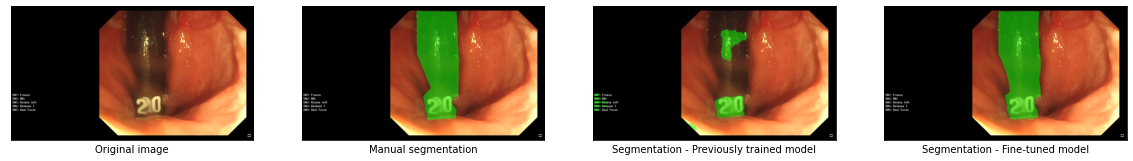

In [12]:
img_file_name = 'data/video9_masks/mask_0137.png'
image = load_image(img_file_name)
#image = resize(image,(1056,1920,3))
with torch.no_grad():
    input_image = torch.unsqueeze(img_to_tensor(img_transform(p=1)(image=image)['image']).cuda(), dim=0)


mask_dataset = load_mask(img_file_name,'binary')

#mask_dataset = sum(mask_dataset,2)
plt.figure(figsize=(20,20))
plt.subplot(141) # Original image
plt.xticks([])
plt.yticks([])
plt.grid(False)
imshow(image)
plt.xlabel('Original image')

plt.subplot(142) # Ground truth
plt.xticks([])
plt.yticks([])
plt.grid(False)
imshow(mask_overlay(image, (mask_dataset > 0).astype(np.uint8)))
plt.xlabel('Manual segmentation')

plt.subplot(143) # Model before training
mask_before = model(input_image)
mask_b = mask_before.data[0].cpu().numpy()[0]
plt.xticks([])
plt.yticks([])
plt.grid(False)
imshow(mask_overlay(image, (mask_b > 0).astype(np.uint8)))
plt.xlabel('Segmentation - Previously trained model')

plt.subplot(144) # Trained model
mask_after = model_ent(input_image)
mask_a = mask_after.data[0].cpu().numpy()[0]
plt.xticks([])
plt.yticks([])
plt.grid(False)
imshow(mask_overlay(image, (mask_a > 0).astype(np.uint8)))
plt.xlabel('Segmentation - Fine-tuned model')


plt.show()